# Chapter 03 회귀 알고리즘과 모델 규제

## 03-1 k-최근접 이웃 회귀

### k-최근접 이웃 회귀

지도 학습 알고리즘은 크게 **분류**와 **회귀**로 나뉜다.

- 분류 : 샘플을 몇 개의 클래스 중 하나로 분류하는 문제

- 회귀 : 클래스 중 하나로 분류하는 것이 아니라 임의의 어떤 숫자를 예측하는 문제

회귀의 예시) 내년도 경제 성장률 예측 등

k-최근접 이웃 알고리즘 또한 회귀에 작동한다.

**-> k-최근접 이웃 분류 알고리즘**

1. 예측하려는 샘플에 가장 가까운 샘플을 k개 선택한다.

2. 그다음 이 샘플들의 클래스를 확인하여 다수 클래스를 새로운 샘플의 클래스로 예측한다.

k = 3(샘플이 3개)라고 가정하면 사각형이 2개로 다수이기 때문에 새로운 샘플 x의 클래스는 사각형이 된다.

아래 그림 참조.

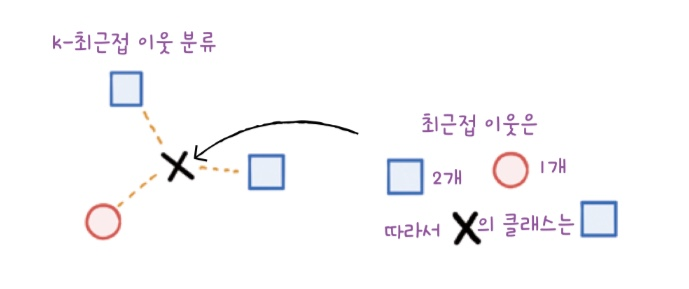

**-> k-최근접 이웃 회귀**

1. 분류와 똑같이 예측하려는 샘플에 가장 가까운 샘플 k개를 선택한다.

2. 이웃 샘플 수치들의 평균을 구한다.

그림에서 이웃한 샘플의 타깃값이 각각 100, 80, 60이고 이를 평균하면 샘플 x의 예측 타깃값은 80이 된다.

아래 그림 참조.

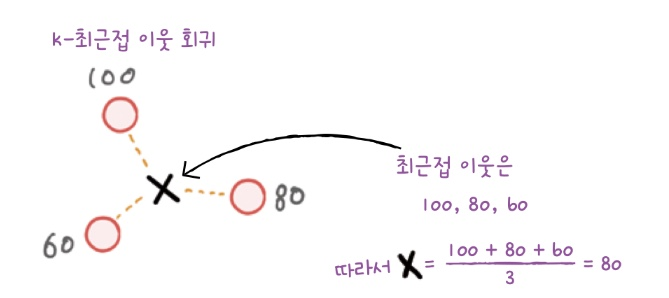

### 데이터 준비

In [1]:
import numpy as np

perch_length = np.array(
    [ 8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
    )

perch_weight = np.array(
    [   5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
    )

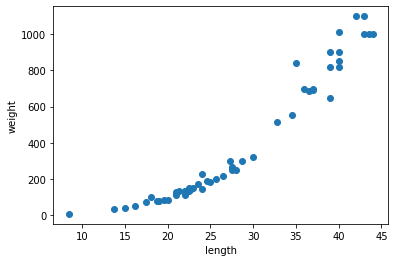

In [4]:
## 산점도 그리기
import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## 농어의 길이가 커짐에 따라 무게도 늘어난다.

In [5]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42)

## 책과 동일한 결과를 도출하기위해 random_state=42로 지정

사이킷런의 train_test_split() 함수를 사용해 훈련 세트와 테스트 세트로 나눈다.

but, 사이킷런에 사용할 훈련 세트는 **2차원 배열**이어야 한다.

reshape() 메서드를 통해 2차원으로 바꿔보자.

In [6]:
## 1차원 배열
test_array = np.array([1, 2, 3, 4])
print(test_array.shape)

(4,)


In [7]:
## 2차원 배열로 변경
test_array = test_array.reshape(2, 2)
print(test_array.shape)

(2, 2)


reshape() 메서드를 사용하여 train_input과 test_input을 2차원 배열로 바꾸자.

train_input.reshape(-1, 1)처럼 사용하면 배열의 전체 원소 개수를 매번 외우지 않아도 2차원 배열로 바뀐다.

In [9]:
## test와 train 2차원 배열로 변경
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


### 결정계수(R^2)

사이킷런에서 k-최근접 이웃 회귀 알고리즘을 구현하는 클래스는 KNeighborsRegressor이다.

사용법은 KNeighborsClassifier와 매우 비슷하다.

객체를 생성하고 fit() 메서드로 회귀 모델을 훈련하자.

In [10]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

# k-최근접 이웃 회귀 모델을 훈련합니다.
knr.fit(train_input, train_target)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [11]:
## 테스트 세트의 점수 확인
print(knr.score(test_input, test_target))

0.9928094061010639


위 점수는 결정계수(coefficient of determination), 즉 R^2이다.

**계산 방법**
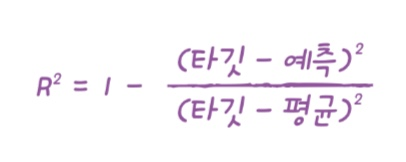

타킷의 평균 정도를 예측하는 수준이면 0에 가깝고,

타깃이 예측에 아주 가까워지면 1에 가까워진다.

0.99의 결과는 아주 좋은 값이지만 다른 값으로도 계산해 보자.

사이킷런은 sklearn.metrics 패키지 중 mean_absolute_error를 사용하자.

mean_absolute_error는 타깃과 예측의 절댓값 오차를 평균하여 반환한다.

In [12]:
from sklearn.metrics import mean_absolute_error

# 테스트 세트에 대한 예측을 만듭니다
test_prediction = knr.predict(test_input)

# 테스트 세트에 대한 평균 절댓값 오차를 계산합니다.
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


결과를 통해 예측이 평균적으로 19g 정도 타깃값과 다르다는 것을 알 수 있다.

지금까지는 훈련 세트를 사용해 모델을 훈련하고 테스트 세트로 모델을 평가했다.

만약 훈련 세트를 사용해 평가하면 어떻게 될까?

### 과대적합 vs 과소적합

In [15]:
## 앞에서 훈련한 모델을 사용해 훈련 세트의 R^2 값을 확인
print(knr.score(train_input, train_target))

## 과소적합 발생
### 원인 : 훈련 세트와 테스트 세트의 크기가 매우 작기 때문

0.9698823289099255


훈련 모델을 사용해 R^2 값을 확인한 결과 0.96이 나왔다.

아까 테스트 모델을 사용했을 떄는 0.99였고 이보다 더 낮게 나온 것을 확인할 수 있다.

그런데 훈련 세트로 훈련을 했으므로 훈련 모델을 이용한 R^2 값이 더 높아야 한다.

**- 과대적합(overfitting)** : 훈련 세트에서 점수가 굉장히 좋았는데, 테스트 세트에서 점수가 굉장이 나쁜 경우

**- 과소적합(underfitting)** : 훈련 세트보다 테스트 세트의 점수가 높거나, 두 점수 모두 낮은 경우

위에서는 과소적합이 발생했다. 해결방법은 모델을 조금 더 복잡하게 만드는 것이다.

k-최근접 이웃 알고리즘으로 모델을 더 복잡하게 만드는 방법은 이웃의 개수 k 를 줄이는 것이다.

기본 k값은 5이므로, 3으로 낮추어보자.

In [18]:
# 이웃의 개수를 3으로 설정합니다
knr.n_neighbors = 3

# 모델을 다시 훈련합니다
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

## 아까보다 R^2 값이 높아진 것을 확인할 수 있다.

0.9804899950518966


In [21]:
print(knr.score(test_input, test_target))

0.974645996398761


테스트 세트의 점수는 훈련 세트보다 낮아졌으므로 과소적합 문제를 해결했다.

또한 두 점수의 차이가 크지 않으므로 과대적합도 아니다.

### 회귀 문제 다루기

**(1) k-최근접 이웃 회귀 모델**

1. 분류와 동일하게 가장 먼저 가까운 k개의 이웃을 찾는다.
2. 이웃 샘플의 타깃 값을 평균하여 이 샘플의 예측값으로 상용한다.

**(2) 사이킷런**

회귀 모델 점수로 R^2, 즉 결정계수 값을 반환한다. 이 값은 1에 가까울수록 좋다.

**(3) 모델 훈련 후**

훈련 세트와 테스트 세트에 대해 모두 평가 점수를 구할 수 있다.

두 점수 차이가 크면 좋지 않다. 일반적으로 훈련 세트의 점수가 조금 더 높다.

테스트 세트의 점수가 너무 낮다면 **과대 적합**

테스트 세트 점수가 너무 높거나, 두 점수 모두 낮으면 **과소 적합**

**if 과대적합**

모델을 덜 복잡하게 만들어야 한다. k-최근접 이웃의 경우 k 값을 늘린다.

**if 과소적합**

모델을 더 복잡하게 만들어야 한다. k-최근접 이웃의 경우 k 값을 줄인다.

## 03-2 선형 회귀